<h1>Finding Trends in the Behavior of the Anna's Hummingbird, Black Swift, Brambling, Harlequin Duck, Lazuli Bunting, and Snowy Owl in King County from 2009-2016</h1>

<h4>Benjamin Hoover - October 4, 2016</h4>


This lab uses crowdsourced 2009-2016 King County bird observation data from the website eBird to answer the following questions about these 6 bird species:
1. Which months of the year are each species the most/least active?
2. Which species are more often seen in groups rather than alone?
3. What trends in the bird's observation data can be seen over time?

In [1]:
import matplotlib.pyplot as plt
import pandas
from datetime import date
% matplotlib inline

<h2>Part 1: Are any species of birds more active in particular months?</h2>

This part of the analysis will use observation dates to determine which months each bird is more likely to be seen, and determine which species reside in King County year round versus seasonally.

In [2]:
#get all the birds
monthName = ["Jan", "Feb","Mar","Apr","May","Jun","July","Aug","Sept","Oct","Nov","Dec"]
def getBirdMonthlyData(name):
    file = open(name + ".csv", "r", errors="ignore")
    flist = []
    january = []
    february = []
    month = [[],[],[],[],[],[],[],[],[],[],[],[]]
    for i in file:
        flist.append(i)
    del flist[0]
    for j in range(len(flist)):
        flist[j] = flist[j].split(",")[22]
        #print(flist[j].split("/")[0])
        month[int(flist[j].split("/")[0])-1].append(flist[j])
    return month

#converts number of observations to percents and returns
def toPercent(arr):
    percentArr = []
    nummy = 0;
    total = 0;
    while nummy < 12:
        total+=len(arr[nummy])
        nummy += 1
    for k in range(len(arr)):
        percentArr.append(round((len(arr[k])/total * 100),2))
    return percentArr

def createTable(arr):
    print("\033[1m" + 'Monthly Percentage of Observations for Each Bird' + "\033[0m")
    print()
    dicty = {}
    birdnames = ["    Anna's Hummingbird","    Black Swift", "    Brambling", "    Harlequin Duck", "    Lazuli Bunting","   Snowy Owl"]
    for i in range(len(arr)):
        percentArr = toPercent(arr[i])
        for j in range(len(percentArr)):
            percentArr[j] = str(percentArr[j])+"% (" + str(len(arr[i][j]))+")"
            
        dicty[birdnames[i]] = percentArr
    print(pandas.DataFrame(dicty, index=monthName))

Monthly Percentage of Observations for Each Bird

         Anna's Hummingbird     Black Swift     Brambling     Harlequin Duck  \
Jan           11.23% (3220)        0.0% (0)      0.0% (0)       23.26% (234)   
Feb           10.65% (3055)        0.0% (0)   34.12% (29)         9.24% (93)   
Mar           11.04% (3166)        0.0% (0)   58.82% (50)       12.13% (122)   
Apr           11.22% (3217)        0.0% (0)     7.06% (6)         9.54% (96)   
May           11.57% (3317)     13.77% (57)      0.0% (0)         4.57% (46)   
Jun            6.49% (1861)    47.58% (197)      0.0% (0)         2.19% (22)   
July           5.78% (1657)     19.32% (80)      0.0% (0)           0.3% (3)   
Aug            7.61% (2181)     14.73% (61)      0.0% (0)         0.99% (10)   
Sept           6.02% (1726)      4.59% (19)      0.0% (0)         3.08% (31)   
Oct            6.02% (1726)        0.0% (0)      0.0% (0)         7.95% (80)   
Nov            5.51% (1581)        0.0% (0)      0.0% (0)       12.03%

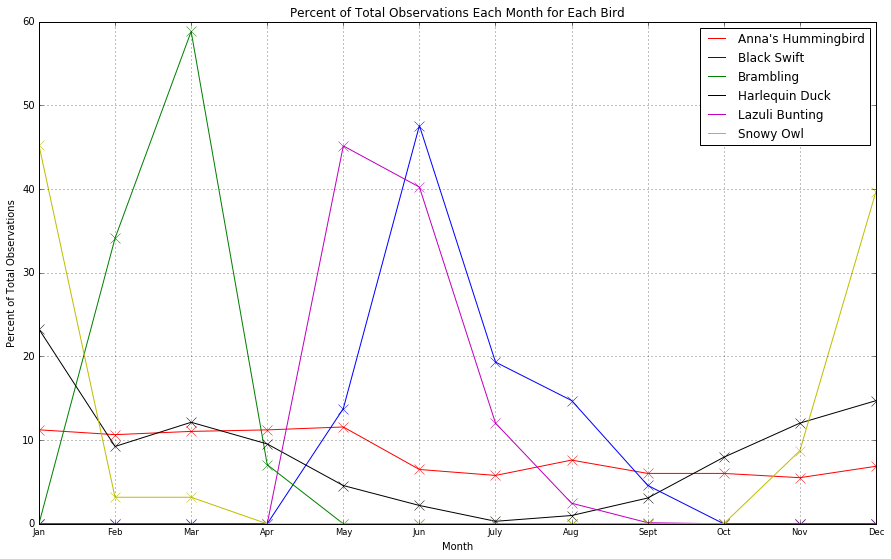

In [3]:
annas = getBirdMonthlyData("AnnasHummingbird")
swifty = getBirdMonthlyData("BlackSwift")
brambling = getBirdMonthlyData("Brambling")
psyduck = getBirdMonthlyData("HarlequinDuck")
lazuli = getBirdMonthlyData("LazuliBunting")
snow = getBirdMonthlyData("SnowyOwl")
createTable([annas, swifty, brambling, psyduck, lazuli, snow])

dumbArray = [1,2,3,4,5,6,7,8,9,10,11,12]
plt.figure(figsize=(15,9))
plt.plot(dumbArray,toPercent(annas),'r',label="Anna's Hummingbird")
plt.plot(dumbArray,toPercent(annas),'rx',ms=10)
plt.plot(dumbArray,toPercent(swifty),label="Black Swift")
plt.plot(dumbArray,toPercent(swifty),'bx',ms=10)
plt.plot(dumbArray,toPercent(brambling),'g',label="Brambling")
plt.plot(dumbArray,toPercent(brambling),'gx',ms=10)
plt.plot(dumbArray,toPercent(psyduck),'k', label="Harlequin Duck")
plt.plot(dumbArray,toPercent(psyduck),'kx',ms=10)
plt.plot(dumbArray,toPercent(lazuli),'m', label="Lazuli Bunting")
plt.plot(dumbArray,toPercent(lazuli),'mx',ms=10)
plt.plot(dumbArray,toPercent(snow),'y',label="Snowy Owl")
plt.plot(dumbArray,toPercent(snow),'yx',ms=10)
plt.legend()
plt.axis([1,12,0,60])
plt.xticks(dumbArray, monthName, size='small')
plt.grid()
plt.ylabel("Percent of Total Observations")
plt.xlabel("Month")
plt.title("Percent of Total Observations Each Month for Each Bird")

As seen in the graph and table, the behavioral patterns of each of the birds vary wildly from one another. Some of the birds are only really visible certain times of the year. These include the Brambling, which only appear from February to April, peaking in March; the Lazuli Bunting, which appears May to September, peaking in May and June; the Black Swift, which also appears from May to September, peaking in June; and the Snowy Owl, which appears from November-March, peaking in December and January. The Harlequin Duck was observed during all months of the year but tends to be less visible in the Summer months (seen 0.3% of the time in July) and more visible during the Winter months (seen 23.26% of the time in January). The Anna's Hummingbird sightings were the most uniformly distributed - January, the month it was seen most often, only accounted for 11.23% of the total observations. However it was still seen more often in certain months - from January to May, each month accounted for 10-11% of the total observations, while from June to December, each month accounted for 5-7% of the total observations.

<h2>Part 2: Are any species seen more often in groups than alone?</h2>

This part of the analysis uses the number of birds seen per observation to determine which birds are more often seen in groups versus which birds are more often seen alone.

In [4]:
#returns [percents up to 15, percents 1-2, raw data up to 15]
def getBirdDensityData(name):
    file = open(name + ".csv", "r", errors="ignore")
    flist = []
    #counting number of observations 1-15. Observations greater than 15 are counted as 15+
    rawData = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    total = 0
    
    #read the file
    for i in file:
        flist.append(i)
    del flist[0]
    for j in range(len(flist)):
        flist[j] = flist[j].split(",")[7]
        #if value is not X, and is greater than 15, put 15
        if flist[j] != "X" and int(flist[j]) > 15:
            rawData[14]+=1
            total+=1
        #if value is not X, and is less than or equal to 15, put that number
        elif flist[j] != "X":
            rawData[int(flist[j])-1]+=1
            total+=1
    

    #convert data into percents (1-15+) 
    percents = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    for i in range(len(rawData)):
        percents[i] = rawData[i]/total*100
    
    #converr data into percents (1-2+)

    outoftwo = [0, 0]
    morethan1 = 0
    for i in range(len(rawData)):
        if i == 0:
            outoftwo[0] = rawData[0]/total*100
        else:
            morethan1+= rawData[i]
    outoftwo[1] = morethan1/total*100
        
    return [percents, outoftwo,rawData]

# array of birds -> inside array is array with percent, outoftwo, rawData
def createDensityTable(arr):
    print("\033[1m" + 'Percentage of Observations for Each Bird' + "\033[0m")
    print()
    dicty = {}
    birdnames = ["    Anna's Hummingbird","    Black Swift", "    Brambling", "    Harlequin Duck", "    Lazuli Bunting","   Snowy Owl"]
    #get percents from array up to 15
    for j in range(len(arr)):
        #now have a bird
        bird = arr[j]
        for i in range(len(bird[0])):
            bird[0][i] = str(round(bird[0][i],2))+"% (" + str(bird[2][i])+")"
        dicty[birdnames[j]] = bird[0]
   
    print(pandas.DataFrame(dicty, index=["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15+"]))

Percentage of Observations for Each Bird

        Anna's Hummingbird     Black Swift     Brambling     Harlequin Duck  \
1            44.5% (11707)    29.97% (119)   100.0% (85)       14.32% (137)   
2            24.99% (6575)     22.17% (88)      0.0% (0)       24.66% (236)   
3            11.64% (3061)     11.08% (44)      0.0% (0)        11.6% (111)   
4             6.14% (1615)      5.54% (22)      0.0% (0)       12.54% (120)   
5             3.98% (1046)      5.04% (20)      0.0% (0)         8.67% (83)   
6              2.65% (697)      3.53% (14)      0.0% (0)         8.15% (78)   
7              1.18% (311)       1.51% (6)      0.0% (0)         3.34% (32)   
8              1.49% (392)      4.28% (17)      0.0% (0)         3.87% (37)   
9              0.59% (156)       0.76% (3)      0.0% (0)         2.72% (26)   
10             0.91% (240)       2.27% (9)      0.0% (0)         2.93% (28)   
11              0.27% (70)       0.25% (1)      0.0% (0)          0.84% (8)   
12        

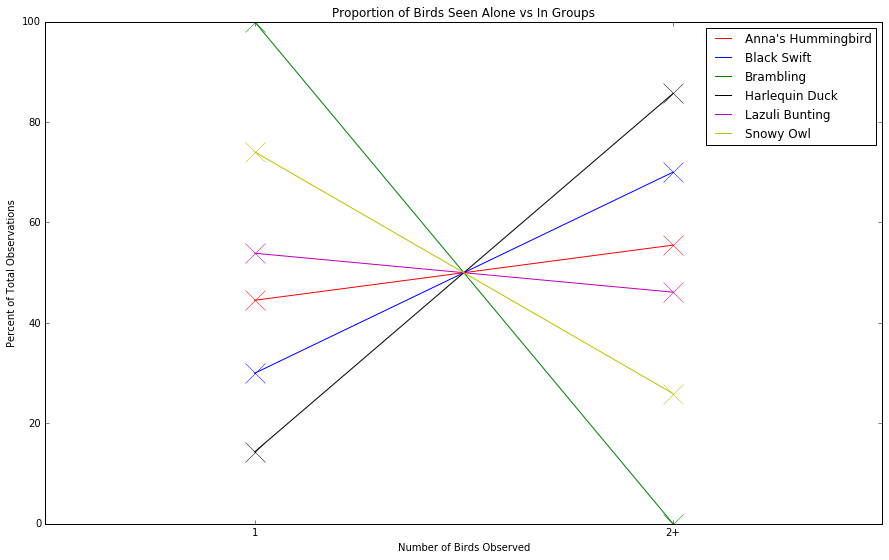

In [5]:
annas = getBirdDensityData("AnnasHummingbird")
swift = getBirdDensityData("BlackSwift")
brambling = getBirdDensityData("Brambling")
duck = getBirdDensityData("HarlequinDuck")
lazuli = getBirdDensityData("LazuliBunting")
snow = getBirdDensityData("SnowyOwl")


createDensityTable([annas, swift, brambling, duck, lazuli, snow])

plt.figure(figsize=(15,9))
newarr = [0,1]

plt.axis([-0.5,1.5,0,100])

plt.xticks([0,1], ["1","2+"], size='medium')
plt.plot(newarr,annas[1],'rx',ms=20)
plt.plot(newarr,annas[1],'r',label="Anna's Hummingbird")
plt.plot(newarr,swift[1],'x',ms=20)
plt.plot(newarr,swift[1],'b',label="Black Swift")

plt.plot(newarr,brambling[1],'gx',ms=20)
plt.plot(newarr,brambling[1],'g',label="Brambling")
plt.plot(newarr,duck[1],'kx',ms=20)
plt.plot(newarr,duck[1],'k',label="Harlequin Duck")
plt.plot(newarr,lazuli[1],'mx',ms=20)
plt.plot(newarr,lazuli[1],'m',label="Lazuli Bunting")
plt.plot(newarr,snow[1],'y',label="Snowy Owl")
plt.plot(newarr,snow[1],'yx',ms=20)
plt.legend()
plt.title("Proportion of Birds Seen Alone vs In Groups")
plt.xlabel("Number of Birds Observed")
plt.ylabel("Percent of Total Observations")

From the graph, a wide variety of conclusions can be made. It is clearly visible that the Brambling was seen exclusively alone, as well as the Snowy Owl, for the most part. The Lazuli Bunting was observed slightly more often alone, while the Anna's Hummingbird was observed slightly more often in groups. Finally, the Black Swift was seen in groups over 70% of the time, and the Harlequin Duck was seen in groups over 80% of the time.

The data table provides additional insight. While the Snowy Owl was occasionally seen in groups, it was only ever seen with 1 other Snowy Owl. The Lazuli Bunting was only seen in groups no larger than 10, as well the Anna's Hummingbird 98% of the time. The Black Swift was seen almost as often in pairs as seen alone, and over 10% of the observations recorded 15+ sightings. Finally, the Harlequin Duck was more often seen in a group of 2 than 1, and almost as often seen in groups of 3 or 4 versus seen alone. The Duck was also seen in even larger groups, with over 3% of observations recording 15+ sightings.

<b>It should be noted that when this analysis says the birds were "seen in a group" - this may not be true 100% of the time</b>, as the number of birds observed does not necessarily mean that all the birds were spotted at the same time or that each sighting recorded was of a different bird. This could make some birds appear to be more prevalent in groups than they actually are. However, the general trend should still remain the same. Additionally, observations that did not include the number of birds seen were disregarded.

<h2>Part 3: What Trends are Visible Over Time?</h2>

This part of the lab will analyze the number of observations on a given date to see if there are any trends in the bird's population over time.

In [6]:
def getBirdOverallData(fileName):
    #days since January 1, 2009
    #there aer 2,799 days between 1/1/2009 and 8/31/2016
    dayData = []
    i = 0
    while i < 2800:
        dayData.append(0)
        i+= 1
    file = open(fileName + ".csv", "r", errors="ignore")
    flist = []
    #add each row in
    for i in file:
        flist.append(i)
    #delete header row
    del flist[0]
    for j in range(len(flist)):
        #get date column
        flist[j] = flist[j].split(",")[22]
        dateArr = flist[j].split("/")
       
        year = 2000 + int(dateArr[2])
        month = int(dateArr[0])
        day = int(dateArr[1])
        
        dObserved = date(year, month, day)
        dStart = date(2009, 1, 1)
        dateDiff = dObserved - dStart
        
        dayData[dateDiff.days]+= 1
    return dayData

def makeScatter(arr, name):
    dayArr = []
    i = 0
    while i < 2800:
        dayArr.append(i)
        i+= 1
    plt.plot(dayArr, arr)
    
    
    #2012 leap year
    years = ["2009","2010","2011","2012","2013","2014","2015","2016"]
    yearDays = [0, 365, 730, 1095, 1461, 1826, 2191, 2556]
    plt.xticks(yearDays, years, size="medium")
    plt.axis([0,2800,0,max(arr)+5])
    plt.title("Number of Observations of the " + name + " Per Day Over Time")
    plt.ylabel("Number of Observations")
    plt.xlabel("Date")

<b>Anna's Hummingbird</b>

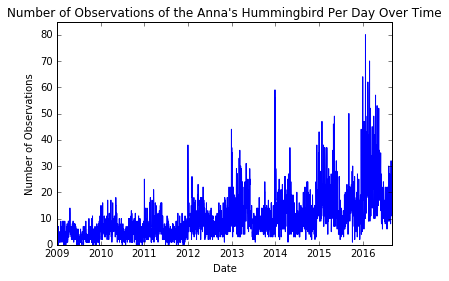

In [7]:
makeScatter(getBirdOverallData("AnnasHummingbird"), "Anna's Hummingbird")

As seen in the graph, there is a fairly positive upward trend in the observations of the Anna's Hummingbird. Over time, both the number of birds seen per day increased, as well as the range of how many birds were seen per day. For example, In 2009-2011 there were usually about 0-10 observations per day, while in 2016, there were usually 10-80 bird sightings per day. This trend could mean that the Anna's Hummingbird population is increasing overall, due to breeding patterns, climate changes, favorable habitat conditions, etc. However, it could also have to do with increased eBird observations thanks to the increased usage of smartphones leading to increased recording of observations.

<b>Black Swift</b>

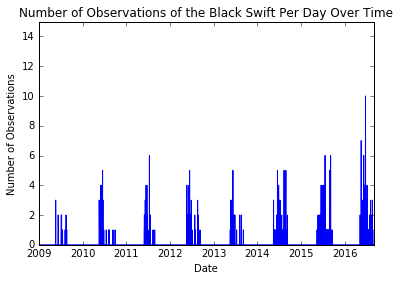

In [8]:
makeScatter(getBirdOverallData("BlackSwift"), "Black Swift")

As seen in the graph, the Black Swift was only observed at certain times of the year. From the graph, it appears that sightings have been more common in recent years. This is shown both by the fact that there were more days with sightings (less blank space between bars) and there were more observations of the bird per day (height of bars). For example, in mid-2009, there were only 1-3 observations per day, and there were many days where there were no sightings at all even during the time of year they are in the area. In 2016, during mid-year when they are visible, there were up to 10 observations per day. In addition, there appears to have been observations almost every day, as visible by the lack of space between bars. This could indicate that the population has been increasing. However, while the frequency of observations has certainly increased, it hasn't by nearly as much as the Anna's Hummingbird. It is also possible that the increased observations could be accounted for almost completely by increased eBird usage.

<b>Brambling</b>

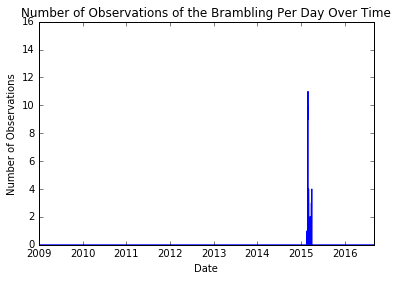

In [9]:
makeScatter(getBirdOverallData("Brambling"), "Brambling")

As visible, the Brambling was only visible in early 2015, despite the data set ranging from 2009-2016. While this could be in part due to the fact that the bird is pretty uncommon, it does not explain how come the bird was only visible in 2015, as opposed to being seen occasionally over the course of 7 years. Therefore, it is highly likely that there was something else that caused this to happen. The presence of the Brambling during 1 year only could be the result of disruption in their normal habitat, or changes in King County that made it a more desirable location for the birds than normal.

One possible explanation could have to do with the weather in early 2015, which was abnormally warm throughout the Pacific Northwest. If the Brambling usually migrates to warmer areas during the winter, this could have made King County a viable option for the birds than it otherwise would have been.

<b>Harlequin Duck</b>

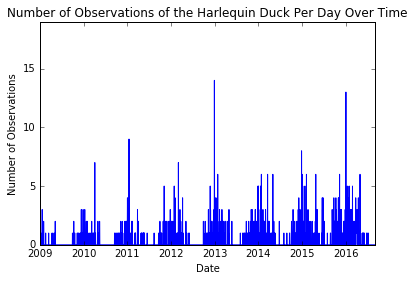

In [10]:
makeScatter(getBirdOverallData("HarlequinDuck"), "Harlequin Duck")

For the Harlequin Duck, the frequency of observations does not appear to increase significantly over time. The only major difference visible is that in earlier years, there seems to be a longer offseason where the birds were not visible, denoted by the large gaps between each cluster of bars. In later years, these gaps have appeared to have gotten smaller.

Once again, these minor differences could be chalked up to increased eBird usage, however, it is also possible that weather changes and favorable habitat conditions in recent years could have caused the birds to stay here longer than they would in the past.

<b>Lazuli Bunting</b>

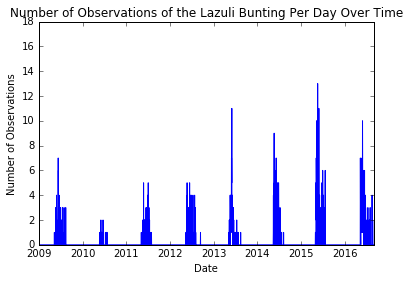

In [11]:
makeScatter(getBirdOverallData("LazuliBunting"), "Lazuli Bunting")

The Lazuli Bunting observation frequency has not seemed to have changed that much over the years. Overall, there appears to be around 3 observations per day during the summer months. Some years (particularly 2014 and 2015) seem to have a slightly higher number of observations per day, however, this does not seem to indicate a long-term trend as in 2016 the number of observations per day seems to be more in line with the rest of the years. In more recent years, there have been days where there have been 10+ observations, which did not occur before 2013. This could be an indicator of increased population, however, as stated earlier, on most days, the number of observations does not seem significantly higher. Therefore, these blips could likely be attributed to increased eBird usage.

The only year that really stands out in the graph is 2010, where the bird seemed to be visible for less time during the year, and there were no more than 2 observations per day. This likely pertains to something relating to the environment - different weather conditions or poor habitat conditions could have caused the birds to have migrated elsewhere. It probably does not have to do much with eBird usage, as eBird usage should go up over time thanks to increased device usage and as more people find out about it.

<b>Snowy Owl</b>

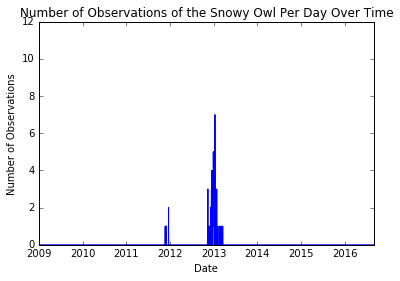

In [12]:
makeScatter(getBirdOverallData("SnowyOwl"), "Snowy Owl")

Similar to the Brambling, the Snowy Owl was only visible during certain years. In this case, there were no sightings of the Snowy Owl until the end of 2011, when there were a few. In winter 2012-2013 there were a fairly significant number of observations relative to 2011, with up to 7 sightings per day. However, after 2013, there were no more observations.

This trend most likely occurred due to some change in the Snowy Owl's normal habitat or a difference in the environment that attracted the Owls here during those years. However, unlike the Brambling, which appeared only in an abnormally warm winter, as indicated by record low mountain snowpack, the 2011-2012 and 2012-2013 winters were not significantly different than usual.

<h2>Conclusion</h2>

The following conclusions can be made about the bird's behaviors in King County based on data from 2009-2016.

<b>The Anna's Hummingbird</b>
<br>
http://www.audubon.org/sites/default/files/Anna%2527s_Hummingbird_b13-44-004_l.jpg

<img src="annas.jpeg" align=left></img>

The Anna's Hummingbird was visible year round, however, it was seen most often in the months of January to May.
<br>The Anna's Hummingbird was seen slightly more often in groups rather than alone.<br>The number of observations of the Anna's Hummingbird increased over time, which could be due to an increasing population.



<b>The Black Swift</b>
<br>
http://da-academy.org/images/BlackSwift.jpg

<img src="BlackSwift.jpeg" align=left></img>

The Black Swift was visible only during the months of May-September, predominantly in June.<br>The Black Swift was seen mostly in groups - only around 30% of the observations recorded only 1 bird.<br>The frequency of Black Swift observations increased slightly over time, but not significantly.

<b>The Brambling</b>
<br>
http://animalia-life.com/data_images/brambling/brambling2.jpg

<img src="brambling.jpeg" align=left></img>

The Brambling was only visible during the months of February-April, predominantly in February.<br>The Brambling was only ever seen alone.<br>The Brambling was only seen during early 2015, which may have been due to abnormal weather conditions.

<b>The Harlequin Duck</b>
<br>
https://www.allaboutbirds.org/guide/PHOTO/LARGE/harlqeun_glennbartley.jpg

<img src="duck.jpeg" align=left></img>

The Harlequin Duck was visible year round, though it was most visible during winter months, predominantly in January, and least visible in summer months, especially in June.<br>The Harlequin Duck was significantly more likely to be seen in a group of 2 or more, more so than all of the other birds. In fact, it was more likely to be seen in a group of two than alone.<br>The frequency of Harlequin Duck observations does not appear to increase much over time, however in more recent years, they seemed to be visible for a longer period of time.

<b>The Lazuli Bunting</b>
<br>
https://www.utahbirds.org/birdsofutah/BirdsL-R_3/LazuliBuntingPH5.jpg

<img src="lazuli.jpeg" align=left></img>

The Lazuli Bunting was only seen from May to September, predominantly in May and June.<br>The Lazuli Bunting was seen slightly more often alone than in groups, though not by much more.<br>The number of Lazuli Bunting observations has not really trended upwards or downwards. The only year that really stands out is 2010, when there was an abnormally low number of observations, likely caused by environmental factors.

<b>The Snowy Owl</b>
<br>
http://yourshot.nationalgeographic.com/u/ss/fQYSUbVfts-T7pS2VP2wnKyN8wxywmXtY0-FwsgxoQUR0_LcqKhRR9EuN-V6_ENCXkfTMq9omngs9kVJKP37/

<img src="owl.jpeg" align=left></img>

The Snowy Owl was only seen from November to March, predominantly in December and January.<br>The Snowy Owl was only seen alone, about 74% of the time, or in a group of two, about 26% of the time.<br>The Snowy Owl was only seen in the Winter of 2011-2012 and the Winter of 2012-2013, possibly due to abnormal environmental factors.
